In [9]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [10]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
df=df[['age','fare','survived']]

In [12]:
df

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [13]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [15]:
X=df[['age','fare']]
y=df['survived']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [20]:
mean_age=X_train['age'].mean()
median_age=X_train['age'].median()

In [21]:
X_train['Age_median']=X_train['age'].fillna(median_age)
X_train['Age_mean']=X_train['age'].fillna(mean_age)


In [22]:
X_train.sample(10)

,age,fare,Age_median,Age_mean
794,25.0,7.8958,25.0,25.000000
455,29.0,7.8958,29.0,29.000000
501,21.0,7.7500,21.0,21.000000
335,NaN,7.8958,28.0,29.498846
858,24.0,19.2583,24.0,24.000000
229,NaN,25.4667,28.0,29.498846
878,NaN,7.8958,28.0,29.498846
861,21.0,11.5000,21.0,21.000000
666,25.0,13.0000,25.0,25.000000
499,24.0,7.7958,24.0,24.000000


In [24]:
# Variance is a measure of how much the values in a dataset differ from the mean.
# In this case, we will calculate the variance of the original 'age' variable and the new variables created by filling missing values with median and mean.
# The variance will help us understand how the distribution of the 'age' variable changes after imputing missing values.
# if the variance is high, it indicates that the values are spread out over a wider range, while a low variance indicates that the values are closer to the mean.
# we have to aware that variance should not be change dramatically after imputing missing values, as it would indicate that the imputation method is significantly altering the distribution of the data.
print('original age variable variance :', X_train['age'].var())
print('median age variable variance :', X_train['Age_median'].var())
print('mean age variable variance :', X_train['Age_mean'].var())


original age variable variance : 210.2517072477438
median age variable variance : 169.20731007048096
mean age variable variance : 168.8519336687225


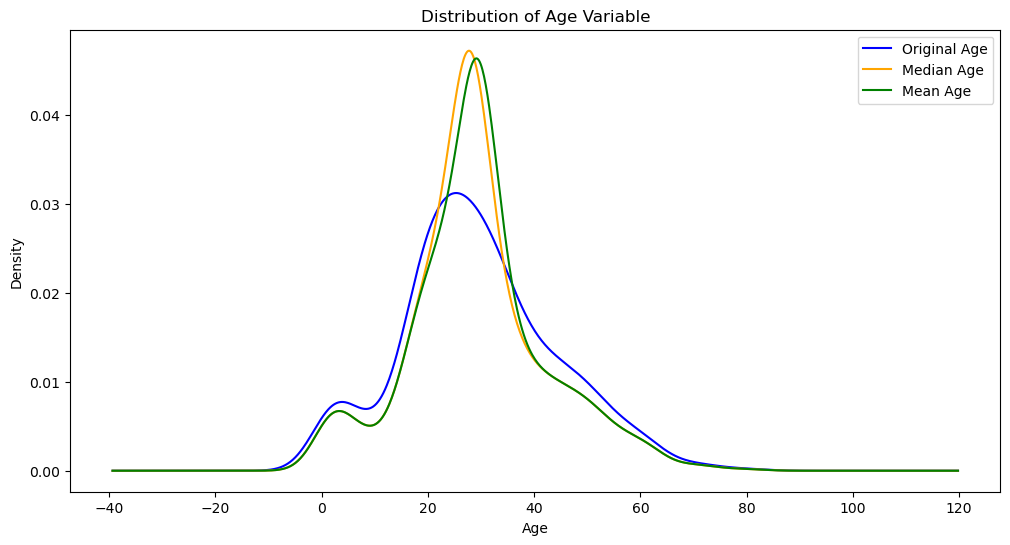

In [25]:
fig= plt.figure(figsize=(12, 6))

# original variable distribution
X_train['age'].plot(kind='kde', label='Original Age', color='blue')

# variable distribution after filling missing values with median
X_train['Age_median'].plot(kind='kde', label='Median Age', color='orange')

# variable distribution after filling missing values with mean
X_train['Age_mean'].plot(kind='kde', label='Mean Age', color='green')
plt.title('Distribution of Age Variable')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [26]:
X_train.cov()

,age,fare,Age_median,Age_mean
age,210.251707,71.580633,210.251707,210.251707
fare,71.580633,2700.831981,61.261919,57.485994
Age_median,210.251707,61.261919,169.207310,168.851934
Age_mean,210.251707,57.485994,168.851934,168.851934


<Axes: >

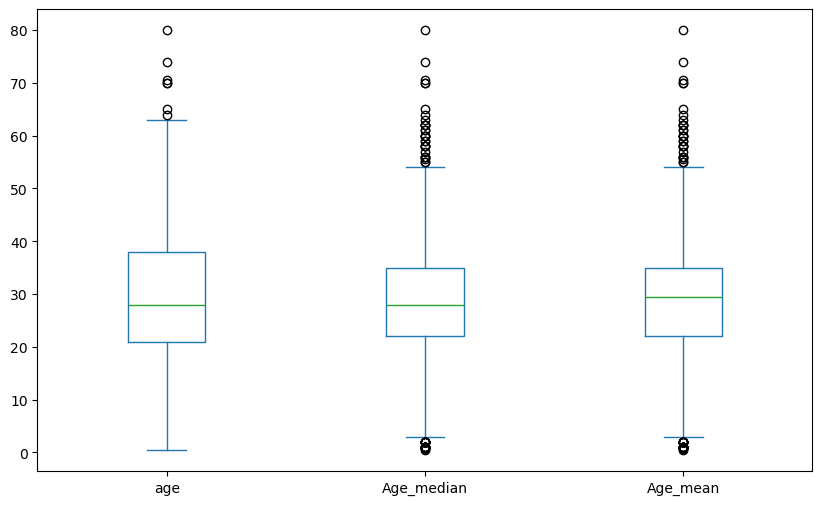

In [27]:
# boxplot 
X_train[['age', 'Age_median', 'Age_mean']].plot(kind='box', figsize=(10, 6))

In [33]:
# using sklearn's SimpleImputer to fill missing values with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train[['age']])
X_train_imputed = pd.DataFrame(X_train_imputed, columns=['age'])

# using sklearn's SimpleImputer to fill missing values with mean
imputer_mean = SimpleImputer(strategy='mean')
X_train_imputed_mean = imputer_mean.fit_transform(X_train[['age']])
X_train_imputed_mean = pd.DataFrame(X_train_imputed_mean, columns=['age'])


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
imputer1=SimpleImputer(strategy='mean')

In [36]:
trf=ColumnTransformer([('imputer1',imputer1,['age'])],remainder='passthrough')

In [37]:
trf.fit(X_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['age'])])

In [39]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [40]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

##### Aribitrary value distribution 

In [43]:
# in arbitraray distribution, we can use a random number generator to fill missing values

df


,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [45]:
x=df[['age','fare']]
y=df['survived']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
X_train['age_99']=X_train['age'].fillna(99)
X_train['age_1']=X_train['age'].fillna(1)

In [48]:
print('original age variable variance :', X_train['age'].var())
print('age_99 variable variance :', X_train['age_99'].var())
print('age_1 variable variance :', X_train['age_1'].var())

original age variable variance : 210.2517072477438
age_99 variable variance : 932.9665366701436
age_1 variable variance : 297.3300095442401


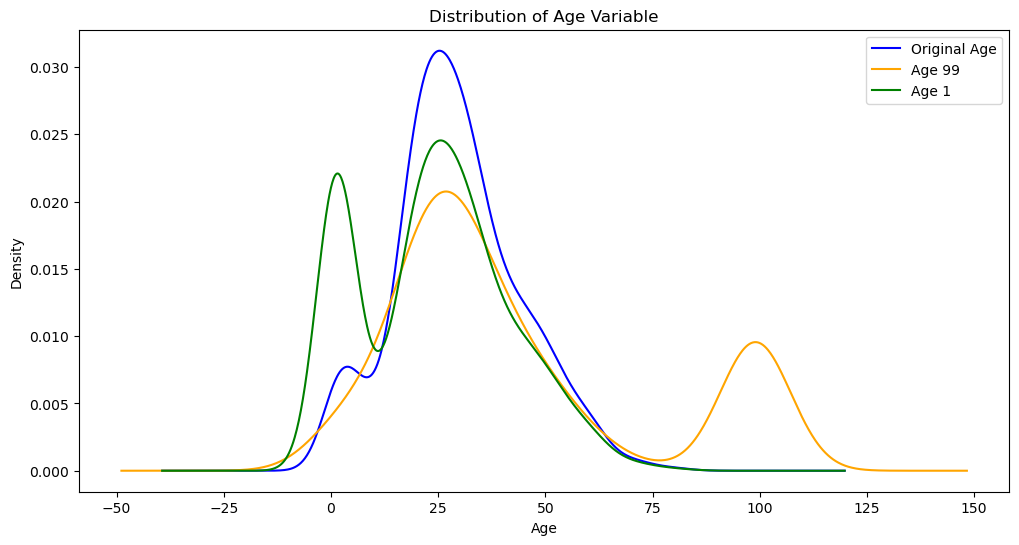

In [49]:
fig=plt.figure(figsize=(12, 6))

# original variable distribution
X_train['age'].plot(kind='kde', label='Original Age', color='blue')

# variable distribution after filling missing values with 99
X_train['age_99'].plot(kind='kde', label='Age 99', color='orange')

# variable distribution after filling missing values with 1
X_train['age_1'].plot(kind='kde', label='Age 1', color='green')
plt.title('Distribution of Age Variable')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: >

<Figure size 1200x600 with 0 Axes>

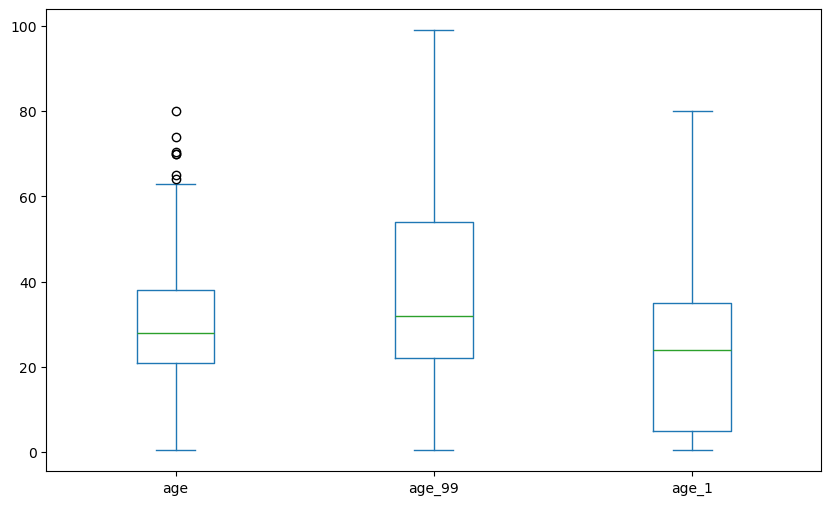

In [50]:
fig= plt.figure(figsize=(12, 6))

# boxplot
X_train[['age', 'age_99', 'age_1']].plot(kind='box', figsize=(10, 6))


In [51]:
X_train.cov()

,age,fare,age_99,age_1
age,210.251707,71.580633,210.251707,210.251707
fare,71.580633,2700.831981,-117.602795,129.280894
age_99,210.251707,-117.602795,932.966537,-144.472138
age_1,210.251707,129.280894,-144.472138,297.330010


In [52]:
# using sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=99)
X_train_imputed = imputer.fit_transform(X_train[['age']])
X_train_imputed = pd.DataFrame(X_train_imputed, columns=['age'])
imputer1 = SimpleImputer(strategy='constant', fill_value=1)
X_train_imputed1 = imputer1.fit_transform(X_train[['age']])
X_train_imputed1 = pd.DataFrame(X_train_imputed1, columns=['age'])



In [54]:
X_train

,age,fare,age_99,age_1
331,45.5,28.5000,45.5,45.5
733,23.0,13.0000,23.0,23.0
382,32.0,7.9250,32.0,32.0
704,26.0,7.8542,26.0,26.0
813,6.0,31.2750,6.0,6.0
...,...,...,...,...
106,21.0,7.6500,21.0,21.0
270,NaN,31.0000,99.0,1.0
860,41.0,14.1083,41.0,41.0
435,14.0,120.0000,14.0,14.0
